In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv("Data/HackerEarth Insurance/train.csv" , parse_dates = ["Expiry_date"])
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [74]:
df.drop(["Image_path"] , axis = 1 , inplace = True)

In [75]:
cats = df.select_dtypes(include = ["object"]).columns
cats

Index(['Insurance_company'], dtype='object')

In [76]:
ints = df.select_dtypes(exclude = ["object"]).columns
ints

Index(['Cost_of_vehicle', 'Min_coverage', 'Expiry_date', 'Max_coverage',
       'Condition', 'Amount'],
      dtype='object')

In [77]:
# df["year"] = df["Expiry_date"].dt.year
# df["month"] = df["Expiry_date"].dt.month
# df["date"] = df["Expiry_date"].dt.day

In [78]:
df.drop(["Expiry_date"] , axis = 1 , inplace = True)
df.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount
0,BQ,41500.0,1037.5,36142.68,0,0.0
1,BQ,50700.0,1267.5,12753.00,1,6194.0
2,A,49500.0,1237.5,43102.68,0,0.0
3,A,33500.0,837.5,8453.00,1,7699.0
4,AC,27600.0,690.0,6978.00,1,8849.0


In [79]:
df.dropna(axis=0 , subset = ["Amount"] , inplace = True)

In [80]:
df.isna().sum()

Insurance_company     0
Cost_of_vehicle      87
Min_coverage         87
Max_coverage         87
Condition             0
Amount                0
dtype: int64

In [81]:
df["mean_coverage"] = (df["Max_coverage"] + df["Min_coverage"]) / 2
df.drop(["Max_coverage" , "Min_coverage"] , axis = 1 , inplace = True)
df.head()

,Insurance_company,Cost_of_vehicle,Condition,Amount,mean_coverage
0,BQ,41500.0,0,0.0,18590.09
1,BQ,50700.0,1,6194.0,7010.25
2,A,49500.0,0,0.0,22170.09
3,A,33500.0,1,7699.0,4645.25
4,AC,27600.0,1,8849.0,3834.00


In [82]:
df.isna().sum()

Insurance_company     0
Cost_of_vehicle      87
Condition             0
Amount                0
mean_coverage        87
dtype: int64

In [83]:
ints = df.select_dtypes(exclude = ["object"]).columns
ints

Index(['Cost_of_vehicle', 'Condition', 'Amount', 'mean_coverage'], dtype='object')

In [84]:
for i in ints:
    df[i].fillna(df[i].median() , inplace = True)

In [85]:
df.isna().sum()

Insurance_company    0
Cost_of_vehicle      0
Condition            0
Amount               0
mean_coverage        0
dtype: int64

In [86]:
df.tail(10)

,Insurance_company,Cost_of_vehicle,Condition,Amount,mean_coverage
1388,BC,31500.0,1,487.0,4370.25
1389,RE,34900.0,1,4906.0,4837.75
1390,AA,27100.0,1,3070.0,3765.25
1391,RE,45200.0,1,7440.0,6254.00
1392,AC,26100.0,1,621.0,3627.75
1393,AC,51500.0,1,4058.0,7120.25
1394,DA,52300.0,1,4565.0,7230.25
1395,BQ,41500.0,1,3363.0,5745.25
1396,AA,31400.0,1,5336.0,4356.50
1397,A,33200.0,1,8734.0,4604.00


In [94]:
for index , row in df.iterrows():
    if row["Amount"] == 0:
        df["Preds"] = 0
    else:
        df["Preds"] = (df["Cost_of_vehicle"] / 10 + df["mean_coverage"]) / 2

In [95]:
from sklearn.metrics import r2_score
def score(true , preds):
    return max(0 , 100*r2_score(true , preds))

In [96]:
df.loc[df["Amount"] == 0 , "Preds"] = 0

In [97]:
df[["Cost_of_vehicle" , "mean_coverage" , "Insurance_company" , "Amount" , "Preds"]].head(10)

,Cost_of_vehicle,mean_coverage,Insurance_company,Amount,Preds
0,41500.0,18590.09,BQ,0.0,0.000
1,50700.0,7010.25,BQ,6194.0,6040.125
2,49500.0,22170.09,A,0.0,0.000
3,33500.0,4645.25,A,7699.0,3997.625
4,27600.0,3834.00,AC,8849.0,3297.000
5,50700.0,7010.25,AC,253.0,6040.125
6,53200.0,7354.00,AC,4013.0,6337.000
7,35700.0,4947.75,BC,2228.0,4258.875
8,37300.0,5319.00,DA,513.0,4524.500
9,48200.0,6666.50,BB,6384.0,5743.250


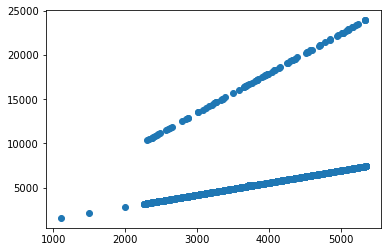

In [99]:
plt.scatter(df["Cost_of_vehicle"].values / 10 , df["mean_coverage"]);

In [98]:
score(df["Amount"].values , df["Preds"].values )

3.3695330959362613

In [18]:
df.drop(["Insurance_company_RE"] , axis = 1 , inplace = True)

In [17]:
df = pd.get_dummies(df , columns = ["Insurance_company"] , prefix = ["Insurance_company"])
# from sklearn.preprocessing import LabelEncoder
# lb = LabelEncoder()
# df[["Insurance_company"]] = lb.fit_transform(df[["Insurance_company"]])
df.head()

,Cost_of_vehicle,Condition,Amount,mean_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O,Insurance_company_RE
0,41500.0,0,0.0,18590.09,0,0,0,0,0,0,1,0,0,0,0
1,50700.0,1,6194.0,7010.25,0,0,0,0,0,0,1,0,0,0,0
2,49500.0,0,0.0,22170.09,1,0,0,0,0,0,0,0,0,0,0
3,33500.0,1,7699.0,4645.25,1,0,0,0,0,0,0,0,0,0,0
4,27600.0,1,8849.0,3834.00,0,0,1,0,0,0,0,0,0,0,0


In [19]:
# df["year"] = df["year"].apply(lambda x : x - 2020)
# df.head()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1397
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cost_of_vehicle       1388 non-null   float64
 1   Condition             1388 non-null   int64  
 2   Amount                1388 non-null   float64
 3   mean_coverage         1388 non-null   float64
 4   Insurance_company_A   1388 non-null   uint8  
 5   Insurance_company_AA  1388 non-null   uint8  
 6   Insurance_company_AC  1388 non-null   uint8  
 7   Insurance_company_B   1388 non-null   uint8  
 8   Insurance_company_BB  1388 non-null   uint8  
 9   Insurance_company_BC  1388 non-null   uint8  
 10  Insurance_company_BQ  1388 non-null   uint8  
 11  Insurance_company_C   1388 non-null   uint8  
 12  Insurance_company_DA  1388 non-null   uint8  
 13  Insurance_company_O   1388 non-null   uint8  
dtypes: float64(3), int64(1), uint8(10)
memory usage: 67.8 KB


In [21]:
X = df.drop(["Amount"] , axis = 1)
y = df["Amount"]

In [22]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1 , random_state = 42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ["Cost_of_vehicle" , "mean_coverage"]
# scaler.fit(X_train[cols])
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

<ipython-input-23-1d5fc2bae288>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols] = scaler.fit_transform(X_train[cols])
C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-23-1d5fc2bae288>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [24]:
X_train.head()

,Cost_of_vehicle,Condition,mean_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O
1151,-1.282317,1,-0.674851,0,0,0,0,1,0,0,0,0,0
1056,1.223264,1,0.169881,0,0,0,0,1,0,0,0,0,0
194,1.153340,1,0.146307,1,0,0,0,0,0,0,0,0,0
1276,0.675532,1,-0.014782,0,0,1,0,0,0,0,0,0,0
826,-1.130816,1,-0.623774,0,0,0,0,1,0,0,0,0,0


In [25]:
X_test.head()

,Cost_of_vehicle,Condition,mean_coverage,Insurance_company_A,Insurance_company_AA,Insurance_company_AC,Insurance_company_B,Insurance_company_BB,Insurance_company_BC,Insurance_company_BQ,Insurance_company_C,Insurance_company_DA,Insurance_company_O
657,0.465763,1,-0.085503,0,0,0,0,1,0,0,0,0,0
210,-0.116931,1,-0.281952,0,1,0,0,0,0,0,0,0,0
429,-1.340586,1,-0.694496,0,1,0,0,0,0,0,0,0,0
684,-0.350008,1,-0.360532,0,0,0,0,0,0,0,1,0,0
1282,-0.653008,1,-0.462686,0,0,0,0,0,0,0,0,1,0


In [27]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor(n_estimators = 200 , random_state = 42)
random.fit(X_train , y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [28]:
random_score = score(random.predict(X_test))
random_score

0

In [29]:
random.score(X_train , y_train)

0.7045604420373996

In [30]:
random.score(X_test , y_test)

-0.16462527772062696

In [31]:
random_preds = random.predict(X_test)
random_preds

array([ 5119.075     ,  5157.71641667,  4540.13      ,  4150.357     ,
        3903.10833333,  5175.96358333,  3726.96      ,  6208.24183333,
        3731.41875   ,  3664.15      ,  4568.67021429,  6328.2088956 ,
        2339.02      ,  3021.56385823,  6233.845     ,  4523.965     ,
        1396.56011959,  2870.8030119 ,     0.        ,  4256.73      ,
        4710.5725    ,     0.        ,  3332.21666667,  5208.85316667,
        3642.97833333,  5679.402     ,  2956.7       ,  3253.20066667,
        1791.01766667,  7583.6925    ,  2943.49464286,  6166.12666667,
        5524.91419678,  7437.00941667,  4932.2805    ,  3677.665     ,
        3234.78916667,  3048.93166667,  4027.88675595,  5504.615     ,
        3521.24      ,  4593.65      ,  4246.38833333,  4788.98683333,
        4202.2415    ,  4332.66983333,  3628.53      ,     0.        ,
        3890.11044048,  2285.82630952,  5487.47425   ,  5064.545     ,
        2624.125     ,  3434.90325   ,  4009.47      ,  2057.60625   ,
      

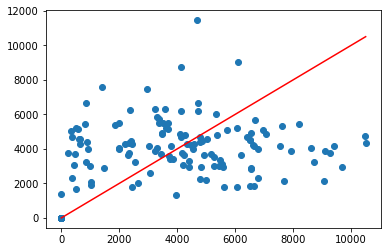

In [32]:
plt.scatter(y_test , random_preds)
x = np.linspace(min(y_test),max(y_test),100)
y = x
plt.plot(x, y , "-r");

In [33]:
random.feature_importances_

array([0.3252088 , 0.11577913, 0.34053921, 0.01971563, 0.02626252,
       0.02121623, 0.02147719, 0.02046688, 0.02226956, 0.02661686,
       0.02028278, 0.02163239, 0.01853284])

In [34]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
xgb.score(X_train , y_train)

C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.716781436134605

In [36]:
xgb.score(X_test , y_test)

C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


-0.1133745344359085

In [37]:
xgb_score = score(xgb.predict(X_test))
xgb_score

C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0

In [38]:
xgb_preds = xgb.predict(X_test)
xgb_preds

C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([ 4237.914  ,  3664.5842 ,  5046.722  ,  3954.3445 ,  3629.6255 ,
        4759.4863 ,  3104.7988 ,  7263.9307 ,  2701.1113 ,  2675.9363 ,
        3618.8755 ,  5974.347  ,  2611.8809 ,  1501.1763 ,  5648.481  ,
        4583.7847 ,   425.03247,  2725.9302 ,  -132.83618,  4586.7954 ,
        3874.019  ,  -449.90845,  3489.9502 ,  5710.8184 ,  3576.1377 ,
        5444.773  ,  3078.6277 ,  3269.098  ,  2448.0137 ,  8983.56   ,
        1810.0272 ,  6570.305  ,  5232.5034 ,  7368.745  ,  5041.761  ,
        3294.8867 ,  1576.499  ,  5303.918  ,  4209.7256 ,  5870.114  ,
        4869.983  ,  3288.9646 ,  2972.056  ,  4505.324  ,  3846.119  ,
        4120.608  ,  3576.1377 ,   105.89958,  2747.1978 ,  2414.7373 ,
        5734.538  ,  4944.0586 ,  2344.37   ,  3532.9927 ,  3286.2673 ,
        1239.425  ,   -43.5385 ,  4702.7656 ,  1600.6246 ,  5247.5317 ,
        4098.1655 ,  3197.1838 ,  6059.4126 ,  4759.531  ,  5394.3604 ,
        4091.8193 ,  1064.2008 ,  3730.6152 ,  2447.6094 ,  3215

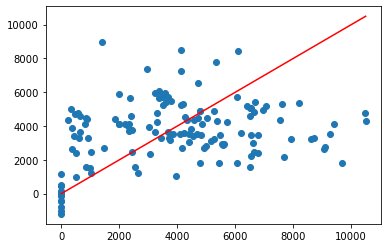

In [39]:
plt.scatter(y_test , xgb_preds)
x = np.linspace(min(y_test),max(y_test),100)
y = x
plt.plot(x, y , "-r");

In [103]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train , y_train)

LinearRegression()

In [104]:
linear.score(X_train , y_train)

0.13118057945580697

In [105]:
linear_score = score(linear.predict(X_test))
linear_score

21.10951239439778

In [106]:
linear_preds = linear.predict(X_test)
linear_preds

array([ 4.27764506e+03,  4.98506743e+03,  4.92994086e+03,  4.05553381e+03,
        4.47963794e+03,  4.04479144e+03,  4.22456009e+03,  4.58735060e+03,
        4.49603560e+03,  4.48168116e+03,  4.25015220e+03,  4.23074398e+03,
        4.32716284e+03,  4.55051035e+03,  4.32786857e+03,  4.26453771e+03,
       -1.06536448e+01,  4.50621836e+03,  5.04744044e+02,  4.53020471e+03,
        4.55844556e+03,  9.64597556e-01,  4.27308841e+03,  4.55228667e+03,
        4.35458441e+03,  4.50081914e+03,  4.51276297e+03,  4.60499053e+03,
        4.14222216e+03,  5.00118558e+03,  4.61389769e+03,  4.47381949e+03,
        4.11491930e+03,  4.07811544e+03,  4.49730469e+03,  4.53768013e+03,
        4.31376244e+03,  4.99114825e+03,  4.58692147e+03,  4.26846166e+03,
        4.45200920e+03,  4.20288958e+03,  4.22588230e+03,  4.45254136e+03,
        4.06938421e+03,  4.22146339e+03,  4.31893340e+03,  1.52218155e+02,
        4.20600637e+03,  4.70084099e+03,  4.50622418e+03,  4.00407434e+03,
        5.10823347e+03,  

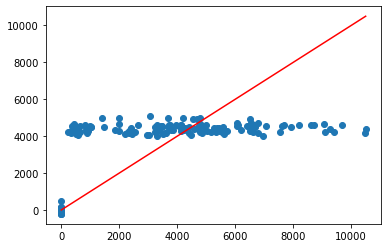

In [107]:
plt.scatter(y_test , linear_preds)
x = np.linspace(min(y_test),max(y_test),100)
y = x
plt.plot(x, y , "-r");

In [108]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state = 42)
gbr.fit(X_train , y_train)

GradientBoostingRegressor(random_state=42)

In [109]:
gbr.score(X_train , y_train)

0.3472433913835504

In [110]:
gbr.score(X_test , y_test)

0.19004051632793406

In [111]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state = 42)
ada.fit(X_train , y_train)

AdaBoostRegressor(random_state=42)

In [112]:
ada.score(X_train , y_train)

0.29089715361369806

In [113]:
ada.score(X_test , y_test)

-0.056868868587532484

In [114]:
tt = pd.read_csv("Data/HackerEarth Insurance/test.csv" , parse_dates = ["Expiry_date"])
tt.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.0
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.0
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.0
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.0
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.0


In [115]:
imgs = tt["Image_path"]
conditions = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1]

In [116]:
tt["year"] = tt["Expiry_date"].dt.year
tt["month"] = tt["Expiry_date"].dt.month
tt["date"] = tt["Expiry_date"].dt.day

In [117]:
tt.drop(["Expiry_date" , "Image_path"] , axis = 1 , inplace = True)
tt.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,year,month,date
0,B,23600,590.0,5978.0,2025,4,12
1,C,28300,707.5,7153.0,2028,8,24
2,AC,43700,1092.5,11003.0,2023,11,28
3,BB,46100,1152.5,11603.0,2028,2,4
4,BB,40700,1017.5,10253.0,2022,1,3


In [118]:
tt["Condition"] = conditions

In [119]:
tt.isna().sum()

Insurance_company    0
Cost_of_vehicle      0
Min_coverage         0
Max_coverage         0
year                 0
month                0
date                 0
Condition            0
dtype: int64

In [120]:
tt.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,year,month,date,Condition
0,B,23600,590.0,5978.0,2025,4,12,1
1,C,28300,707.5,7153.0,2028,8,24,1
2,AC,43700,1092.5,11003.0,2023,11,28,1
3,BB,46100,1152.5,11603.0,2028,2,4,1
4,BB,40700,1017.5,10253.0,2022,1,3,1


In [121]:
tt["Insurance_company"] = lb.transform(tt["Insurance_company"])
tt[cols] = scaler.transform(tt[cols])

In [124]:
tt = tt[X_train.columns]
tt.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,year,month,date
0,3,-1.620279,-1.620279,-0.748697,1,2025,4,12
1,7,-1.072547,-1.072547,-0.578596,1,2028,8,24
2,2,0.722148,0.722148,-0.021244,1,2023,11,28
3,4,1.001840,1.001840,0.065616,1,2028,2,4
4,4,0.372532,0.372532,-0.129819,1,2022,1,3


In [125]:
preds = random.predict(tt)
preds

array([ 3775.22      ,  4156.78      ,  4247.33      ,  2803.51      ,
        4611.27      ,  4552.45      ,  3706.46      ,  4213.55      ,
        3721.19      ,  5128.09      ,  2731.15      ,  6959.33      ,
        4156.61      ,  4492.38      ,  6700.19      ,  5261.86      ,
        3583.78      ,  4666.06      ,  3858.73      ,  2695.58      ,
        4730.2       ,  4895.67      ,  3901.04      ,  4519.31      ,
        2637.26      ,  5349.88      ,  2645.6       ,  4465.26      ,
        3837.75      ,  5743.92      ,  4315.74      ,  4700.71      ,
        3398.75      ,  4744.23      ,  4672.01      ,  3792.58      ,
        4219.97      ,  3956.23      ,  3218.81      ,  3830.49      ,
        2719.93      ,  5652.75      ,  3621.73      ,  3533.1       ,
        5158.02      ,  4242.43      ,  4194.41      ,  3960.27      ,
        1192.39      ,  5191.02      ,  3481.06      ,  3362.09      ,
        3887.72      ,  4073.37      ,  4892.69      ,  3970.24      ,
      